# Plot Scripts

## Setup and Common Functions

### Import libraries

In [42]:
from benchmarks.experiments.wrapper_overhead.common.data_collection_utility import WrapperOverheadCollectionUtility
import numpy as np
from matplotlib import rc, pyplot as plt

### Setup Common Resources

In [43]:
region = 'ca-west-1'
collection_utility: WrapperOverheadCollectionUtility = WrapperOverheadCollectionUtility(region)

### Plotting functions

In [44]:
def dynamic_bar_plot(experimental_results, experiment_order, plotting_order, figsize=(14, 6)):
    fig, ax = plt.subplots(figsize=figsize)

    # Setting up the style and font size as per the provided preferences
    plt.rcParams["pdf.fonttype"] = 42
    fontsize = 15
    rc('font', size=fontsize)  # Adjust font size globally

    bar_width = 0.14  # Specified bar width
    colors = ["#1a2441", "#1b6145", "#697b30", "#c87b7c", "#cda2e0", "#c6e1f1"]  # Specified color scheme
    hatches = ["", "/", "\\", "x", "o", "."]  # Pattern styles for differentiation
    
    num_categories = len(plotting_order)
    # num_experiments = len(experiment_order)
    
    # Compute positions for each set of bars
    positions = np.arange(len(experiment_order)) * (num_categories * bar_width + bar_width)
    
    for i, experiment in enumerate(experiment_order):
        for j, category in enumerate(plotting_order):
            values = experimental_results[experiment].get(category, [0])
            mean_value = np.mean(values)  # Calculate mean for simplicity

            # Divide by 1000 to convert to seconds
            mean_value /= 1000

            ax.bar(i + j * bar_width, mean_value, bar_width, label=f"{category}" if i == 0 else "",
                   color=colors[j % len(colors)], hatch=hatches[j % len(hatches)], edgecolor="black", zorder=3)

    # Setting x-ticks and labels
    ax.set_xticks(positions + (bar_width * num_categories) / 2)
    ax.set_xticklabels(experiment_order, fontsize=fontsize)
    
    ax.legend(title="Category", fontsize=fontsize)
    ax.set_ylabel('End-To-End-Latency (s)', fontsize=fontsize)
    ax.set_title('Experimental Results Comparison', fontsize=fontsize + 2)
    ax.grid(axis='y', which='both', zorder=0, alpha=0.6)

    plt.tight_layout()
    plt.show()

In [45]:
def dynamic_box_plot_with_all_labels(experimental_results, experiment_order, plotting_order, figsize=(14, 12)):
    fig, ax = plt.subplots(figsize=figsize)

    plt.rcParams["pdf.fonttype"] = 42
    fontsize = 15
    rc('font', size=fontsize)  # Adjust font size globally

    colors = ["#1a2441", "#1b6145", "#697b30", "#c87b7c", "#cda2e0", "#c6e1f1"]
    
    data_for_box_plots = []
    all_labels = []  # This will include labels for all categories, including those with zero-data
    non_empty_data_positions = []  # Positions of categories with non-zero data for actual plotting
    current_position = 0  # Tracks the position for non-empty data sets
    
    for i, experiment in enumerate(experiment_order):
        for j, category in enumerate(plotting_order):
            label = f"{category}\n({experiment})"
            all_labels.append(label)
            if category in experimental_results[experiment] and np.any(experimental_results[experiment][category]):
                # Include this category's data only if it's non-zero
                values = np.array(experimental_results[experiment][category]) / 1000  # Convert to seconds
                data_for_box_plots.append(values)
                non_empty_data_positions.append(current_position)
            current_position += 1

    # Plotting non-empty box plots
    if data_for_box_plots:
        bp = ax.boxplot(data_for_box_plots, positions=non_empty_data_positions, patch_artist=True, widths=0.6)

        # Coloring and styling the boxes
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            
        # Adjusting the x-axis to include all categories
        ax.set_xticks(range(len(all_labels)))
        ax.set_xticklabels(all_labels, fontsize=fontsize, rotation=45, ha="right")
        ax.set_xlim(-0.5, len(all_labels) - 0.5)  # Adjust x-axis limits to include all labels
    else:
        # No non-empty data to plot
        ax.text(0.5, 0.5, 'All categories have zero-data', horizontalalignment='center', verticalalignment='center',
                fontsize=fontsize, transform=ax.transAxes)
    
    ax.set_ylabel('End-to-End Latency (s)', fontsize=fontsize)
    ax.set_title('Experimental Results Distribution', fontsize=fontsize + 2)
    ax.grid(axis='y', which='both', zorder=0, alpha=0.6)

    plt.tight_layout()
    plt.show()

In [46]:
def dynamic_box_plot_filtered(experimental_results, experiment_order, plotting_order, figsize=(14, 12)):
    fig, ax = plt.subplots(figsize=figsize)

    # Apply the style and font size preferences
    plt.rcParams["pdf.fonttype"] = 42
    fontsize = 15
    rc('font', size=fontsize)  # Adjust font size globally

    # Colors for the box plots
    colors = ["#1a2441", "#1b6145", "#697b30", "#c87b7c", "#cda2e0", "#c6e1f1"]
    
    # Prepare data for box plots, filtering out categories with all zeros
    data_for_box_plots = []
    labels = []
    for i, experiment in enumerate(experiment_order):
        for j, category in enumerate(plotting_order):
            if category in experimental_results[experiment]:
                # Convert to seconds and filter out all-zero categories
                values = np.array(experimental_results[experiment][category]) / 1000
                if not np.all(values == 0):
                    data_for_box_plots.append(values)
                    labels.append(f"{category}\n({experiment})")
    
    # Only proceed if there is data to plot
    if data_for_box_plots:
        # Box plot properties
        boxprops = dict(linestyle='-', linewidth=3, color='k')
        flierprops = dict(marker='o', color='#e7298a', markersize=6)
        medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
        whiskerprops = dict(linestyle='--', linewidth=2.5, color='orange')
        capprops = dict(linewidth=2.5, color='gray')

        bp = ax.boxplot(data_for_box_plots, labels=labels, patch_artist=True, boxprops=boxprops,
                        flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops,
                        capprops=capprops, notch=False, vert=True, widths=0.7, manage_ticks=True)

        # Coloring boxes
        for patch, color in zip(bp['boxes'], colors * len(experiment_order)):
            patch.set_facecolor(color)

        # Setting labels and title
        ax.set_ylabel('End-to-End Latency (s)', fontsize=fontsize)
        ax.set_title('Experimental Results Distribution', fontsize=fontsize + 2)
        ax.grid(axis='y', which='both', zorder=0, alpha=0.6)
        ax.tick_params(axis='x', rotation=45, labelsize=fontsize-2)
        ax.tick_params(axis='y', labelsize=fontsize-2)

        plt.tight_layout()
    else:
        ax.text(0.5, 0.5, 'No Data to Display', horizontalalignment='center', verticalalignment='center',
                fontsize=fontsize, transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

## Ploting Experiments

### All Non-Join

#### Gather data

In [47]:
allowed_experiment_types = {
    'boto3_direct': 'Direct Calls',
    'boto3_sns': 'SNS Calls',
    'multi_x': 'EntsGuard',
    'aws_step_function': 'AWS Step Function',
}
plotting_order = ['Direct Calls', 'SNS Calls', 'EntsGuard', 'AWS Step Function']

experiment_order = ['Data Visualization', 'Image Processing']
experiment_paths = ['./dna_visualization/external_database', './image_processing/external_database']

# experiment_order = ['Data Visualization']
# experiment_paths = ['./dna_visualization/external_database']

experiment_order = ['Image Processing']
experiment_paths = ['./image_processing/external_database']

experimental_results = collection_utility.aquire_experimental_results(experiment_paths, allowed_experiment_types, from_user_invocation=True)

Unique CPU Models:  {'Intel(R) Xeon(R) Processor @ 2.90GHz'}
Unique CPU Models:  {'Intel(R) Xeon(R) Processor @ 2.90GHz'}
Unique CPU Models:  {'Intel(R) Xeon(R) Processor @ 2.90GHz'}
Unique CPU Models:  {'Intel(R) Xeon(R) Processor @ 2.90GHz'}


In [48]:
# Print the length of the results
for experiment in experimental_results:
    print(f"Experiment: {experiment}")
    for category in experimental_results[experiment]:
        print(f"Category: {category} -> {len(experimental_results[experiment][category])}")
    print()

Experiment: Image Processing
Category: EntsGuard -> 102
Category: Direct Calls -> 104
Category: SNS Calls -> 103
Category: AWS Step Function -> 99



#### Plot data

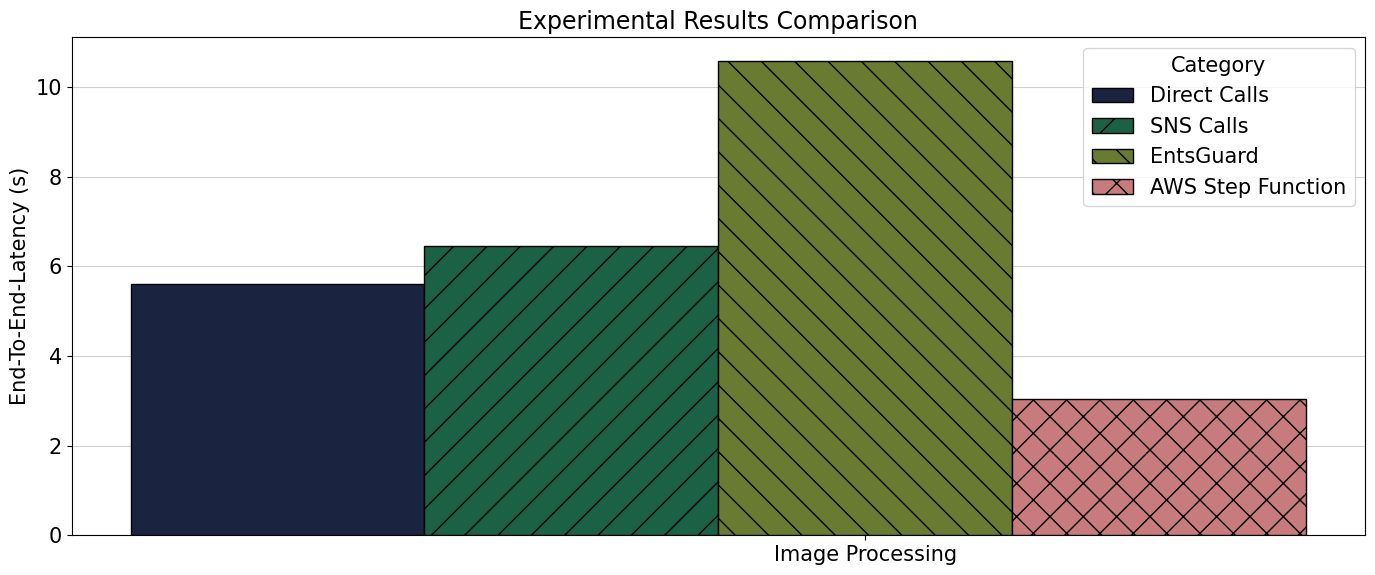

In [49]:
dynamic_bar_plot(experimental_results, experiment_order, plotting_order)

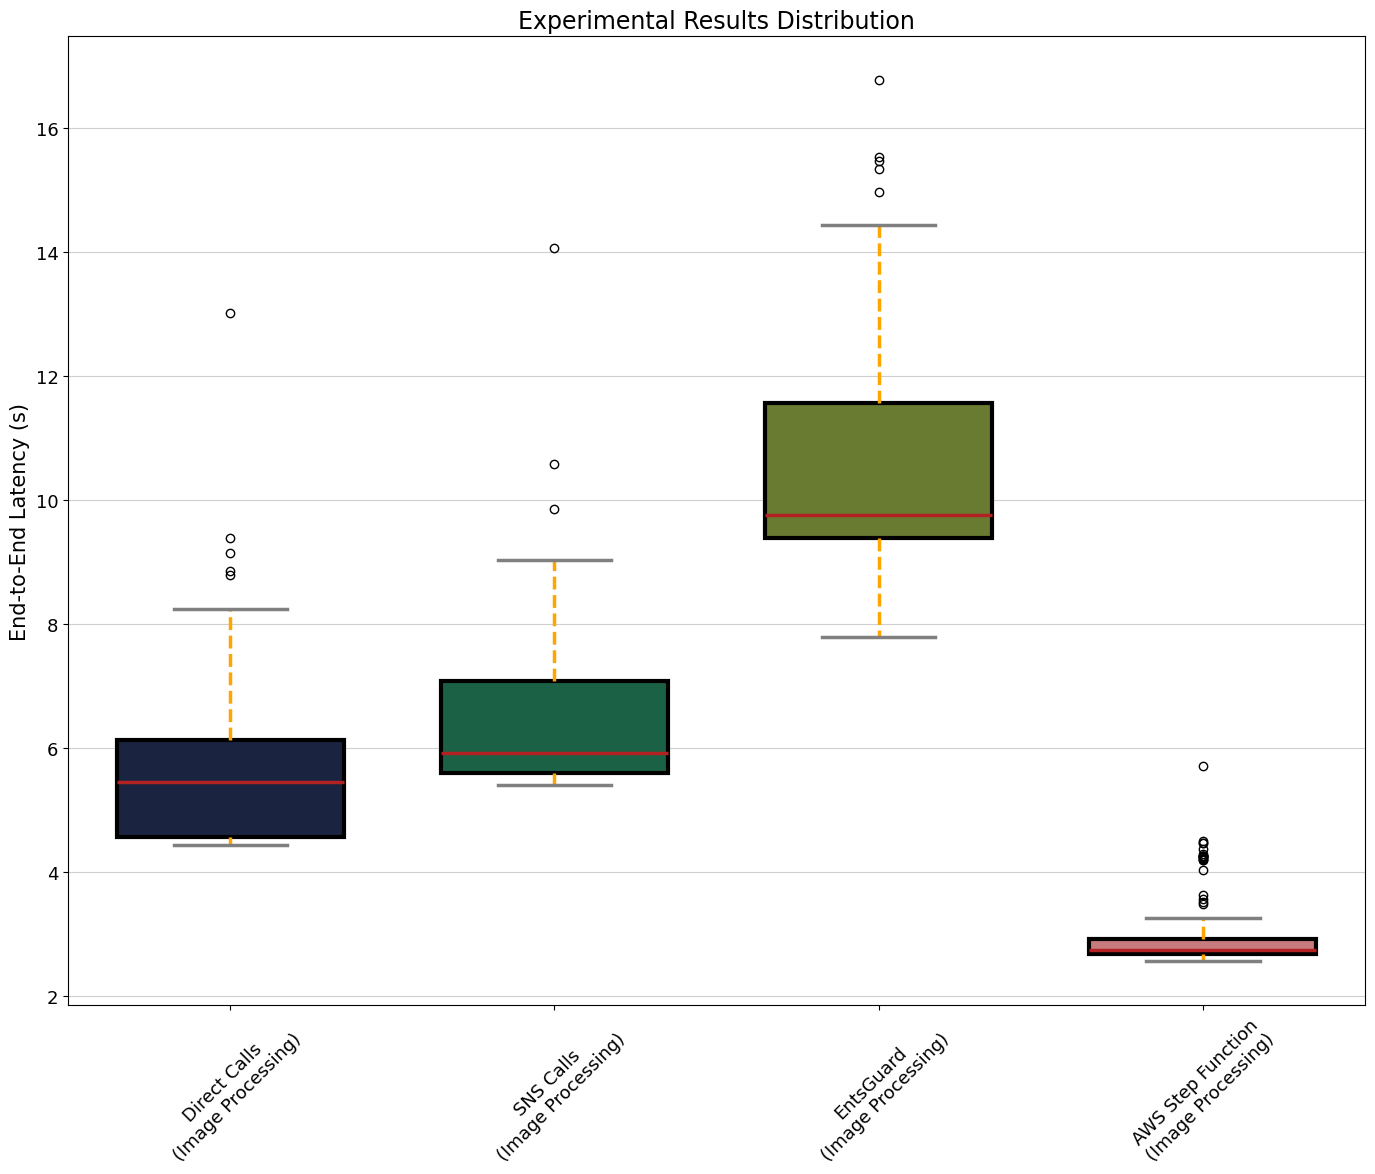

In [50]:
dynamic_box_plot_filtered(experimental_results, experiment_order, plotting_order)

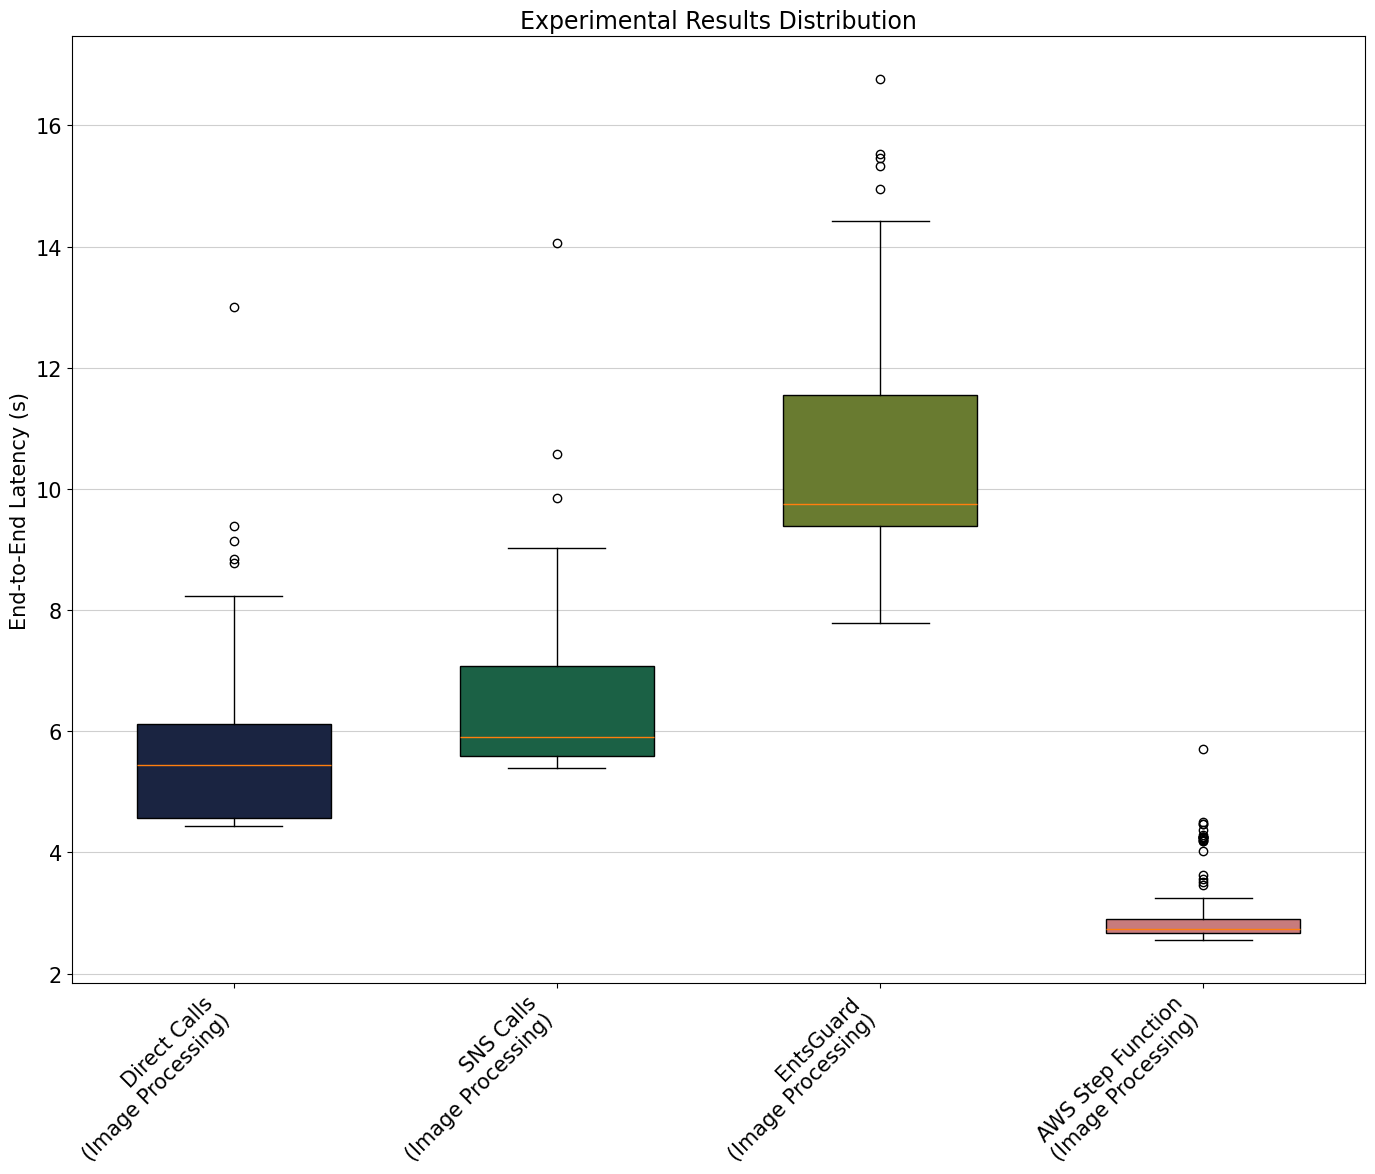

In [51]:
dynamic_box_plot_with_all_labels(experimental_results, experiment_order, plotting_order)